## O que veremos neste Jupyter Notebook?

* Tipos de gráficos
  * Gráficos de linha
  * Gráficos de barras
  * Gráficos espaciais
* Uso do shapefile
  * Adicionar shapefile ao mapa
  * Uso do shapefile para mascarar o dado

## O que vou aprender no fim deste Jupyter Notebook?

**Noções** sobre geração de gráficos e uso de shapefile.

## Leitura recomendada

* [https://matplotlib.org/stable/tutorials/text/mathtext.html](https://matplotlib.org/stable/tutorials/text/mathtext.html)

## Importação de bibliotecas

In [55]:
import xarray as xr
import proplot as pplt
#import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Tipos de gráficos

Uso da biblioteca proplot.

[https://proplot.readthedocs.io/en/stable/index.html](https://proplot.readthedocs.io/en/stable/index.html)

### Gráficos de linha

Exemplo 0:

In [56]:
ds = xr.open_dataset("../dados/serie.chuva.202210.nc")

ds

<xarray.Dataset>
Dimensions:  (time: 31, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 2022-10-01 2022-10-02 ... 2022-10-31
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Data variables:
    prec     (time, lat, lon) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Wed Nov 23 08:25:38 2022: cdo -fldmean -mergetime M...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

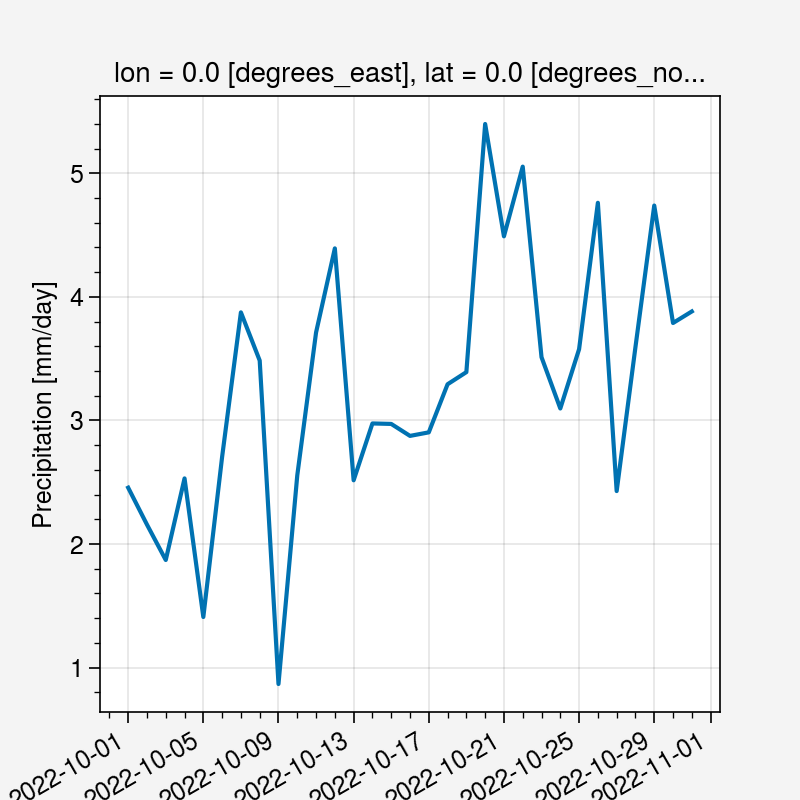

In [57]:
ds.prec[:,0,0].plot()

Exemplo 1:

In [58]:
ds = xr.open_dataset("../dados/serie.chuva.202210.nc")

ds

<xarray.Dataset>
Dimensions:  (time: 31, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 2022-10-01 2022-10-02 ... 2022-10-31
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Data variables:
    prec     (time, lat, lon) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.10 (https://mpim...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    history:              Wed Nov 23 08:25:38 2022: cdo -fldmean -mergetime M...
    CDO:                  Climate Data Operators version 1.9.10 (https://mpim...

In [59]:
prec = ds.prec[:,0,0]

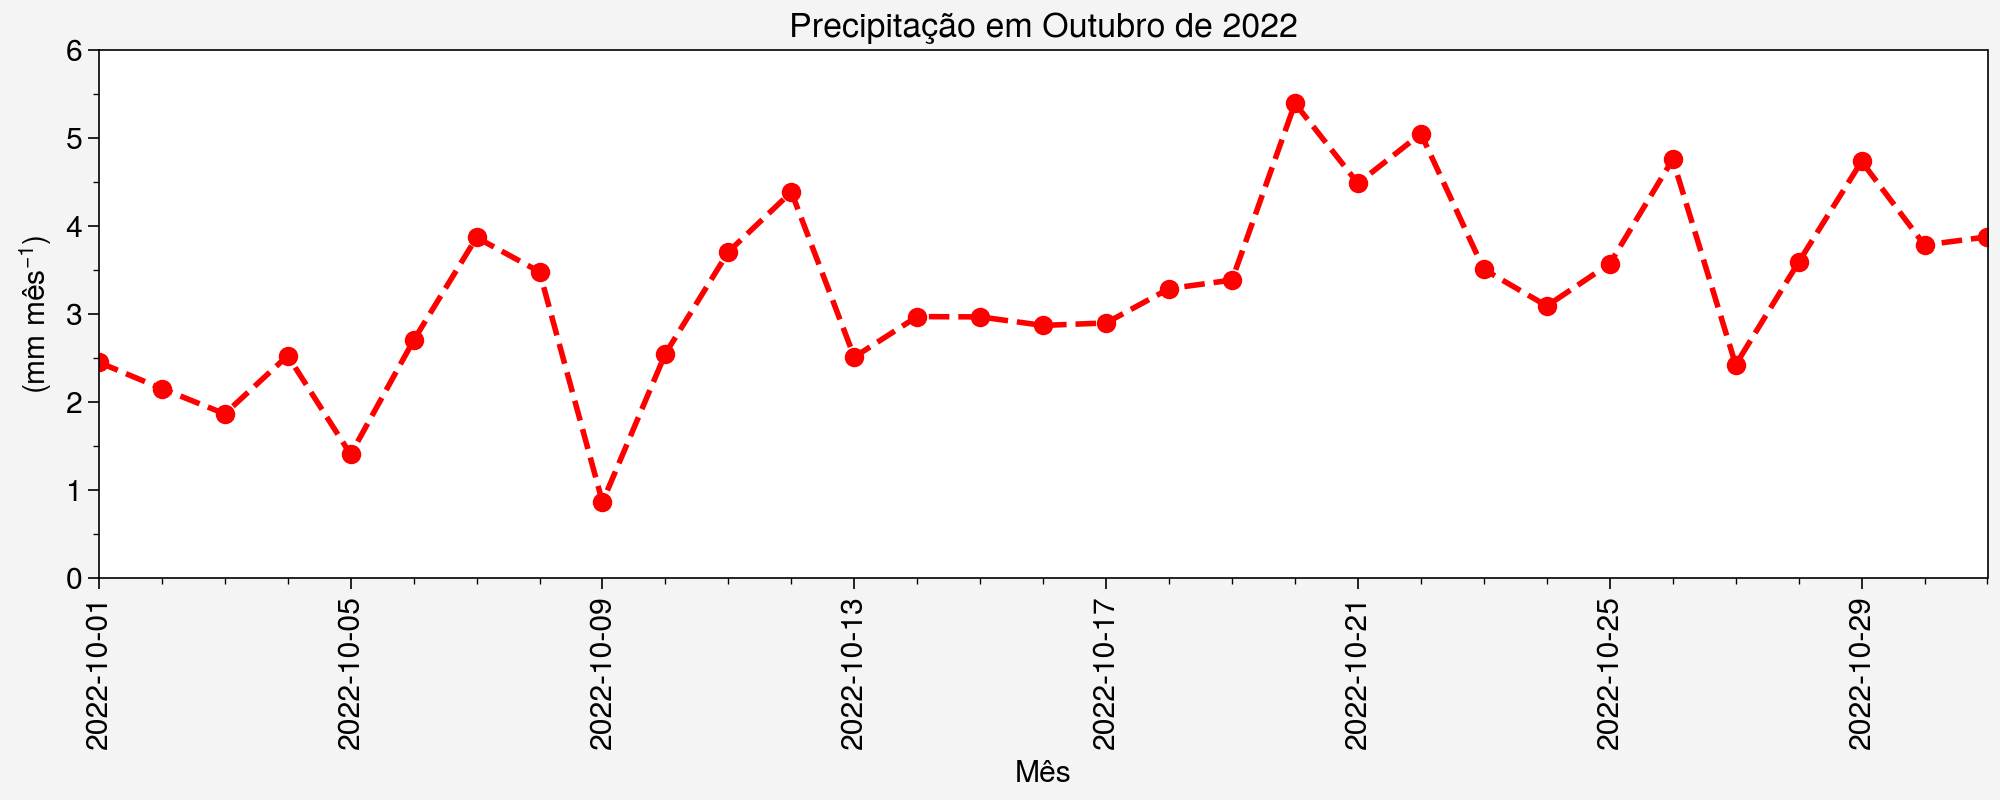

In [60]:
# Cria alguns objetos que serão utilizados para a formatação da figura.
fig = pplt.figure(figsize=(10, 4)) # largura e altura da figura.
ax = fig.subplot()

# Formatação da figura.
ax.format(title='Precipitação em Outubro de 2022', xlabel='Mês', ylabel=r'(mm mês$^{-1}$)', grid=False, 
          large='17px', small='15px', ylim=(0, 6), ylocator=1, yminorlocator=0.5)

# Plot do gráfico.
ax.plot(prec, linewidth=2, linestyle='--', color='red', marker='o')

# Salva a figura.
fig.save('ex01.jpg', dpi=300, bbox_inches='tight')

### Gráficos de barras

### Gráficos espaciais

## Uso do shapefile

### Adicionar shapefile ao mapa

### Uso do shapefile para mascarar o dado